In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
from collections import Counter
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

In [2]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [3]:
#Missing Values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#No missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


303 rows & 14 columns

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Generate categorical and numerical columns

In [6]:
cat_col = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca','thal','fbs','target']
num_col = ['age', 'trestbps', 'chol','thalach','oldpeak']


First Look at categorical data 

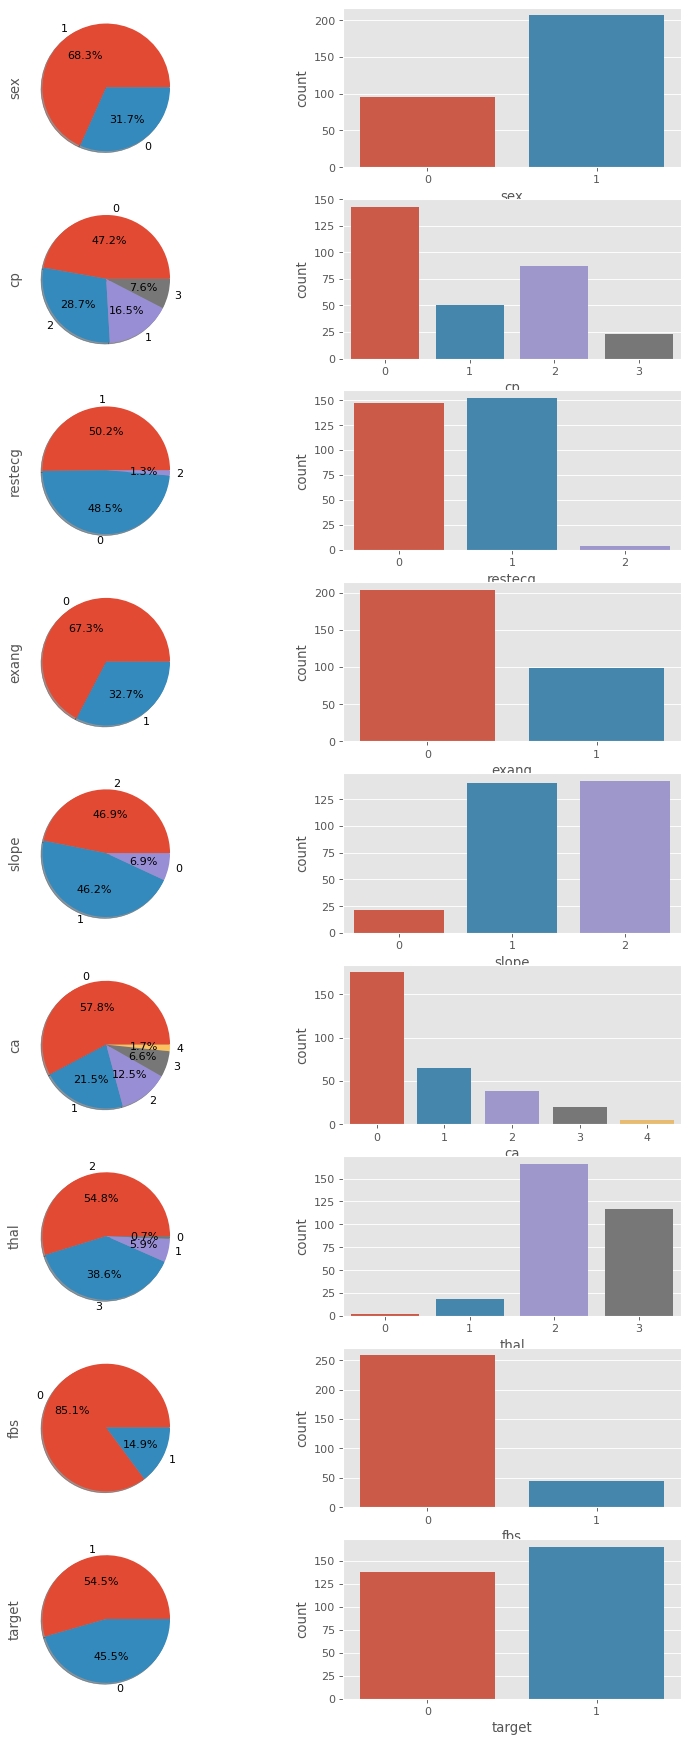

In [7]:
plt.figure(figsize=(12, 28))
count = 1
for cols in cat_col:
    plt.subplot(9, 2, count)
    data[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    count +=1
    plt.subplot(9, 2, count)
    sns.countplot(cols, data=data)
    count+=1

* male (68.3%), female (31.7%) 
* cp - maximum value is 0 (47.2%) i.e.  0 -> 2-> 1 -> 3
* restecg - max occurance is 0(50.2%) & 1 (48.5%), 2 (1.3%) is minimal
* exang - 67.3% have no and 32.7% are yes
* slope - max occurance of 1&2 (46%), 0 is minimal (6.9%)
* ca- values from 0 to 4, 0 -> 1 -> 2 -> 3 -> 4 
* thal - 0,1,2,3 ; 2&3 are max, o is min
* fbs - 85.1% = 0 n 14.9%=1
* target - 54.5% have heart diesese, 45.5% have none

Numerical Data - Outlier detection and removal

In [8]:
features = num_col

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        print("col", col)
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        print("Q1", Q1)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        print("Q3", Q3)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        print("IQR", IQR)
        # outlier step
        outlier_step = 1.5 * IQR
        print("outlier_step", outlier_step)
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    print("outlier_indices",outlier_indices)
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[features]))))


col age
Q1 47.5
Q3 61.0
IQR 13.5
outlier_step 20.25
col trestbps
Q1 120.0
Q3 140.0
IQR 20.0
outlier_step 30.0
col chol
Q1 211.0
Q3 274.5
IQR 63.5
outlier_step 95.25
col thalach
Q1 133.5
Q3 166.0
IQR 32.5
outlier_step 48.75
col oldpeak
Q1 0.0
Q3 1.6
IQR 1.6
outlier_step 2.4000000000000004
outlier_indices Counter({101: 2, 8: 1, 110: 1, 203: 1, 223: 1, 241: 1, 248: 1, 260: 1, 266: 1, 28: 1, 85: 1, 96: 1, 220: 1, 246: 1, 272: 1, 204: 1, 221: 1, 250: 1, 291: 1})
The dataset contains 0 observations with more than 2 outliers


No outliers > 2, hence no need to drop

Numerical Data Analysis

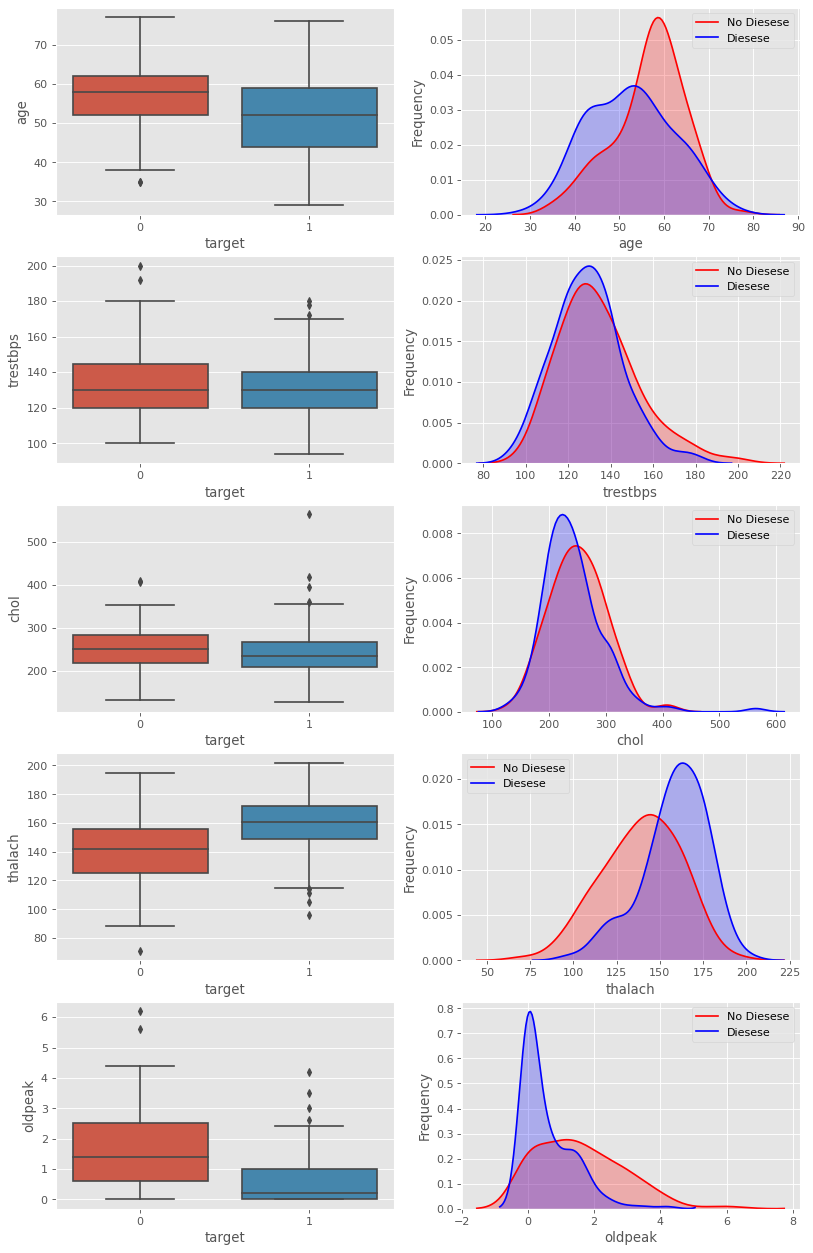

In [9]:
plt.figure(figsize=(12, 24))
count = 1
for cols in num_col:
    plt.subplot(6, 2, count)
    sns.boxplot(x='target', y= cols, data= data)
    count +=1
    plt.subplot(6, 2, count)
    
    g = sns.kdeplot(data[cols][(data["target"] == 0) & (data[cols].notnull())], color="Red", shade = True)
    g = sns.kdeplot(data[cols][(data["target"] == 1) & (data[cols].notnull())], ax =g, color="Blue", shade= True)
    g.set_xlabel(cols)
    g.set_ylabel("Frequency")
    g = g.legend(["No Diesese","Diesese"])
    count+=1

* age - young people (25-30) have higher chance than older people
* For People having heart diesese - max distribution lies between (45-59) 
  Vs not having heart diesese (51-62)
* trestbps - people with value 190-220 & (80-85) have no heart diesese
* chol - people with very high chol (530-600) have heart diesese
* fbs - Doesn't not have any variance
* thalach - people with value (52-85) do not have diesese
* max freq of having diesese is between (150-172)
* oldpeak - people with value (5-7)& (-1.5 to -1.2) : No diesese


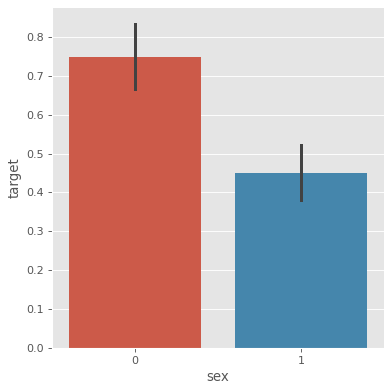

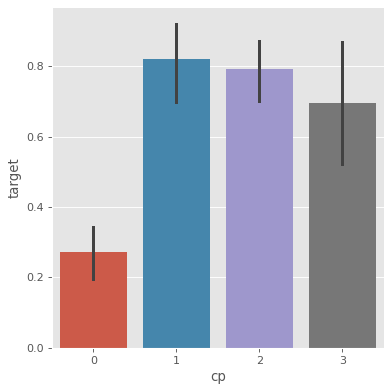

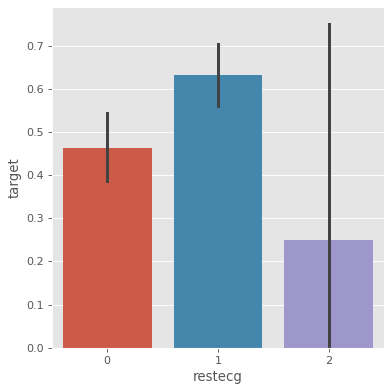

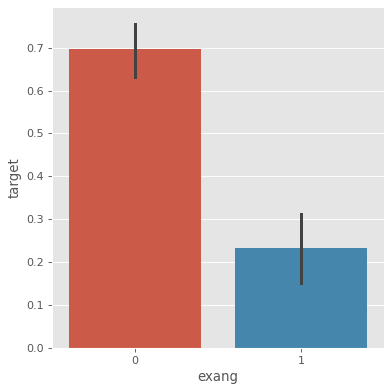

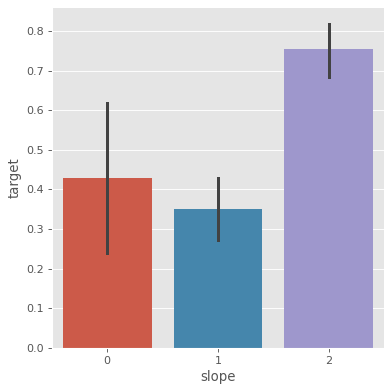

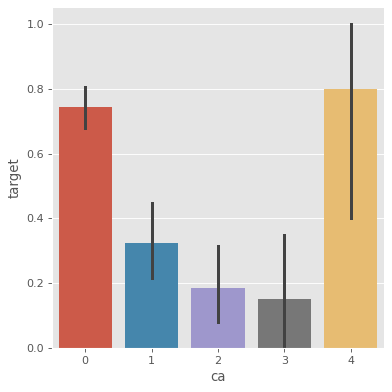

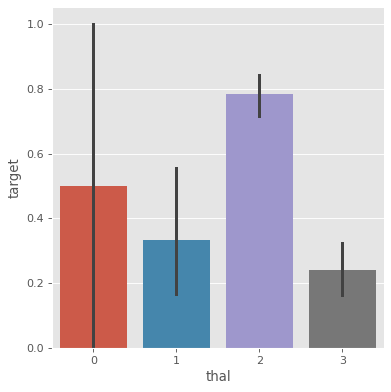

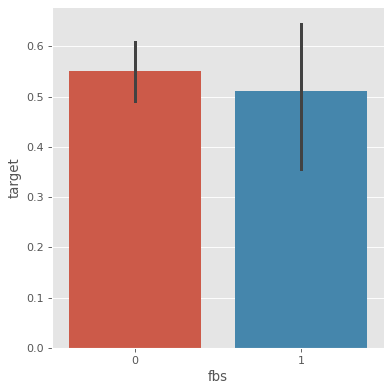

In [10]:
#Categorical Variables : Catplot
for cols in cat_col:
    if cols!='target':
        sns.catplot(x=cols,y='target',kind='bar',data=data)


* sex - Female have more chance of heart diesese than male
* cp - Value 1,2&3 indicate higher chance of heart diesese than 0
* restecg - Value 0 & 1 indicate higher chance of diesese than 2.
* Value 2 seems to be a outlier
* exang - value 0 indicates higher chance of diesese than 1
* slope - 2 indiactes higher chances of diesese than 0&1
* ca - Value 4&0 have higher chance of diesese than 1,2,3
* thal - Value 2 have highest chance and 3 have minimum chance of heart diesese
* fbs - fbs=0 have slightly higher chance of heart diesese than fbs=1


Explore Categorical Variables

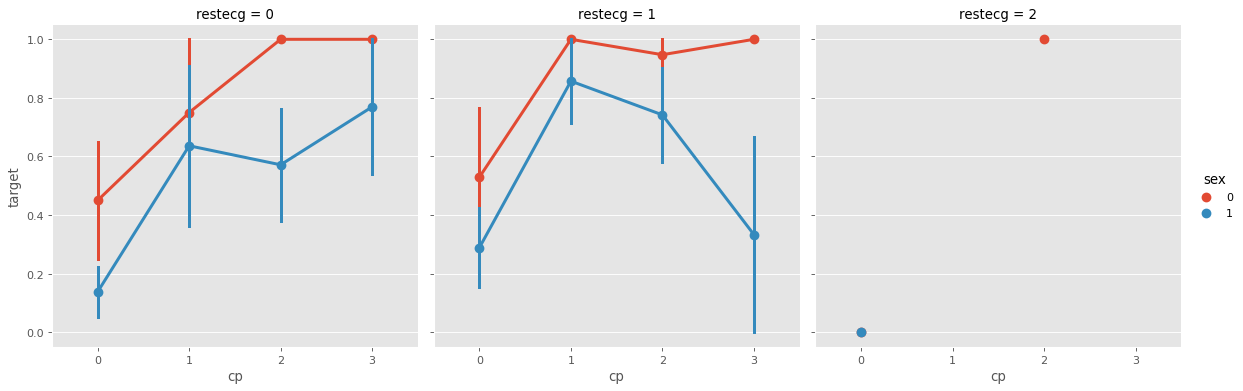

In [11]:
#Catplot cp+target+restecg+sex
sns.catplot(x='cp',y='target',kind='point',data=data,col='restecg',hue='sex')


female have higher chances of having heart diesese than male for cp = 0to3 & restecg from 0-2

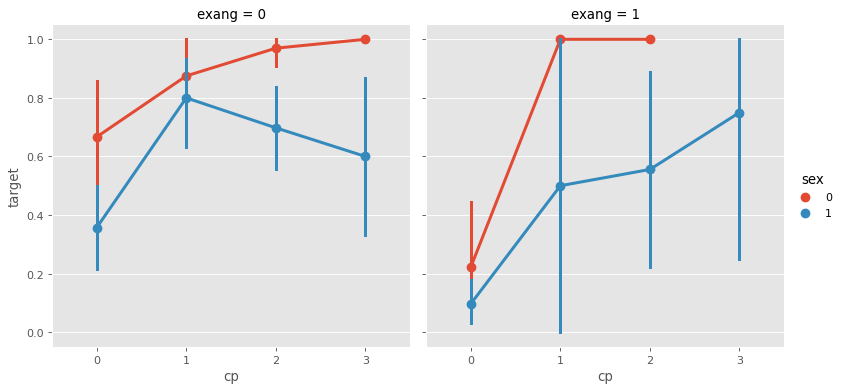

In [12]:
#Catplot cp+target+exang+sex
sns.catplot(x='cp',y='target',kind='point',data=data,col='exang',hue='sex')


female have higher chances of having heart diesese than male for cp = 0to3 & exang from 0-3
except for cp=3 & exang=3 for which female does not have heart diesese


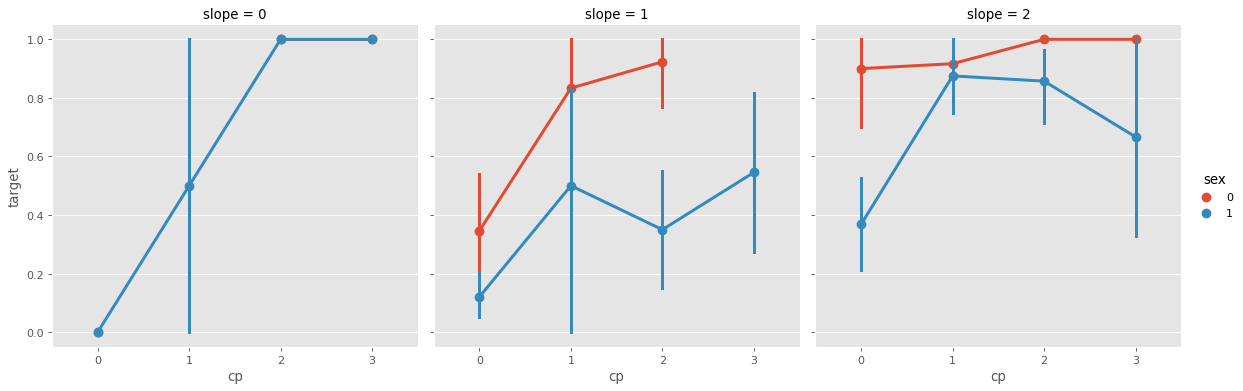

In [13]:
#Catplot cp+target+slope+sex
sns.catplot(x='cp',y='target',kind='point',data=data,col='slope',hue='sex')


* female have no heart diesese for slope =0 & cp = 0to3
* for slope = 1 & 2, female have higher chance of heart diesese than male
* for cp=0to3, except slope=1 & cp=3, for which female have no heart diesese


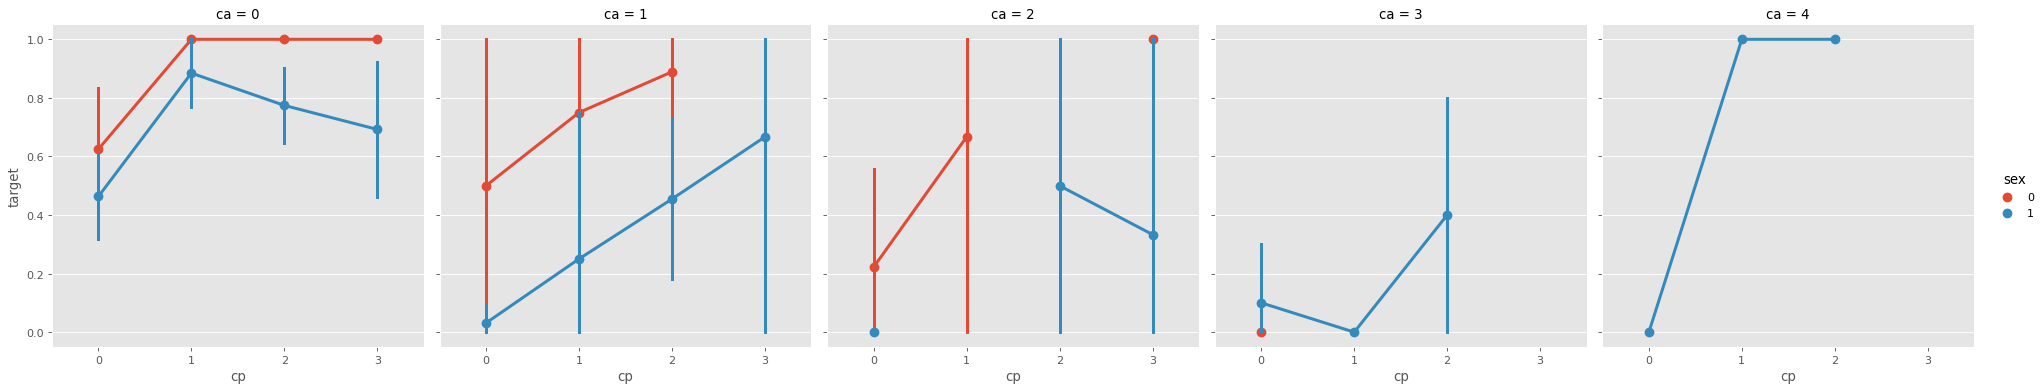

In [14]:
#Catplot cp+target+ca+sex
sns.catplot(x='cp',y='target',kind='point',data=data,col='ca',hue='sex')



* Female - 
* For ca=0, higher chance for female than male for diesese
* For ca=1, & cp=0to2,higher chance for female than male for diesese
* For ca=2& cp=0,1, only female have diesese
* For ca=3 & 4 female do not have diesese

* male - 
* For (ca=1 & cp=3) and (ca=2 & cp=2to3) and ca=3 and 4, only male have diesese


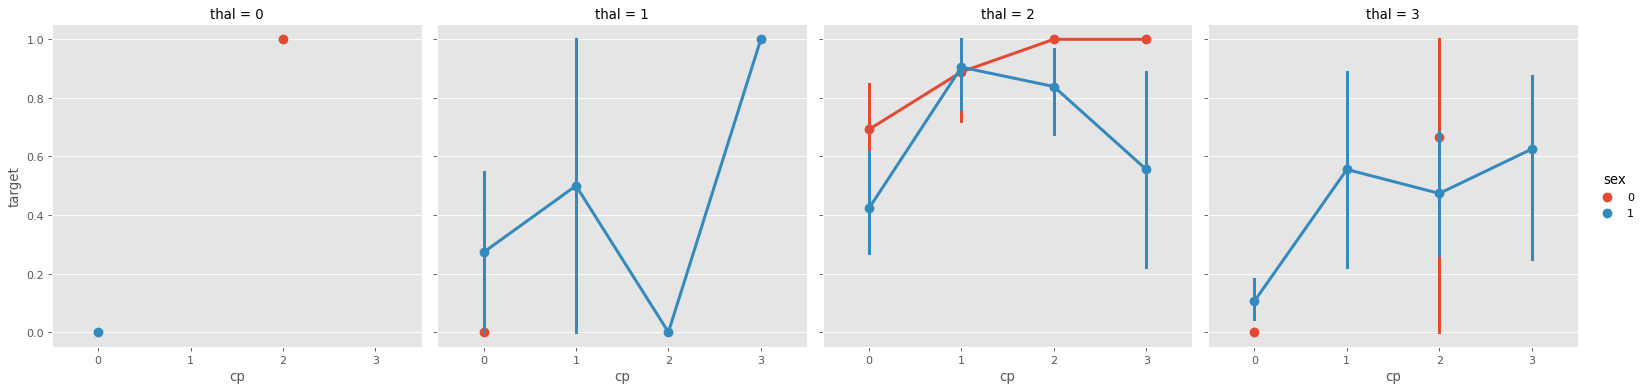

In [15]:
#Catplot cp+target+thal+sex
sns.catplot(x='cp',y='target',kind='point',data=data,col='thal',hue='sex')

* male - for thal=0 & cp=2, only male have diesese
* for thal=1 & cp=0-3 only male have diesese
* for thal=2 & cp=0,2,3 , female have higher chance than male of heart diesese
* except for cp=1 where both have equal chance for heart diesese
* For thal=3, female have higher chance for cp=2, for other cp values only male have heart diesese


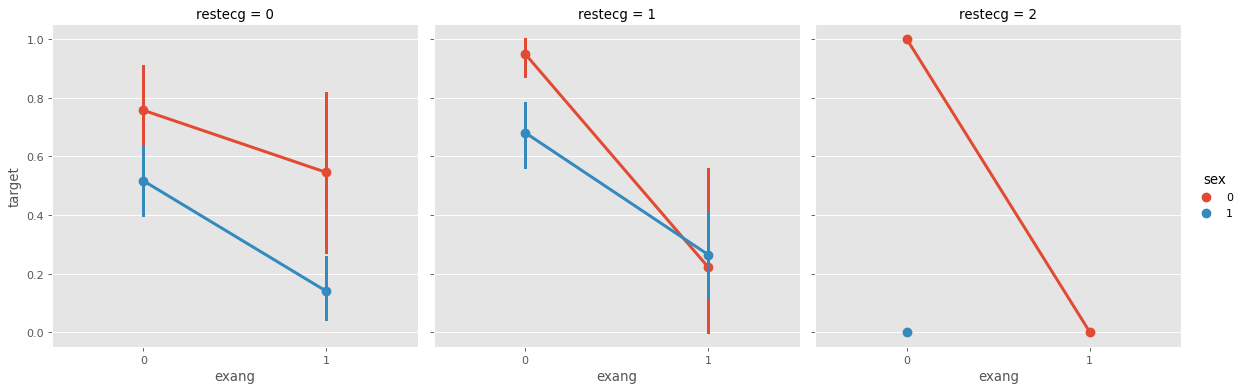

In [16]:
#Catplot restecg+target+exang+sex
sns.catplot(x='exang',y='target',kind='point',data=data,col='restecg',hue='sex')


* for restecg=2, only female have diesese for exang=0
* For restecg=0, female have higher diesese chance than male


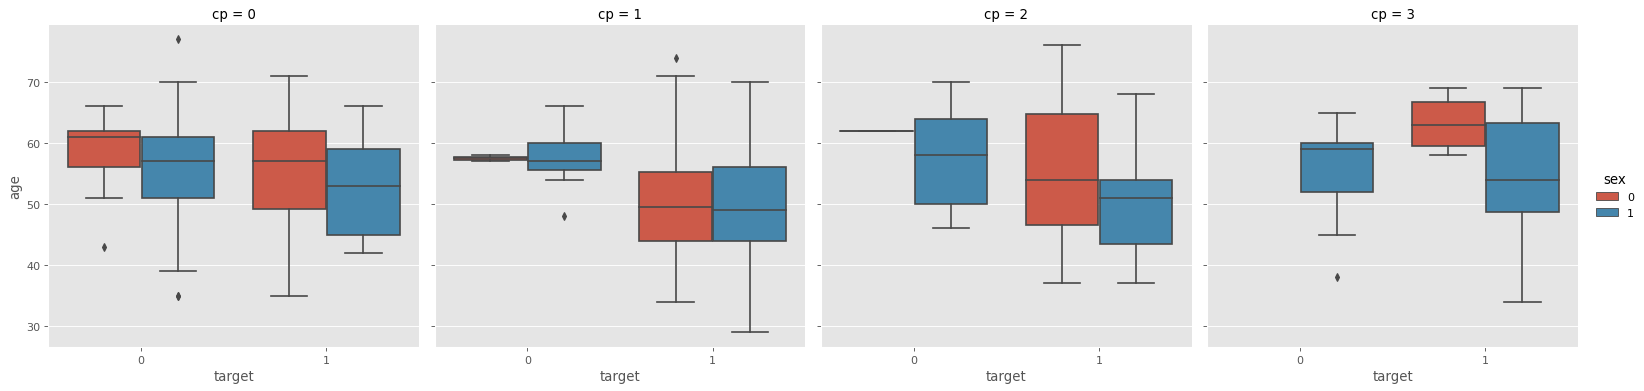

In [17]:
#Explore Numerical Variables
sns.catplot(x='target',y='age',data=data,kind='box',hue='sex', col='cp')


For cp=0&3 age of female is slightly higher than male 

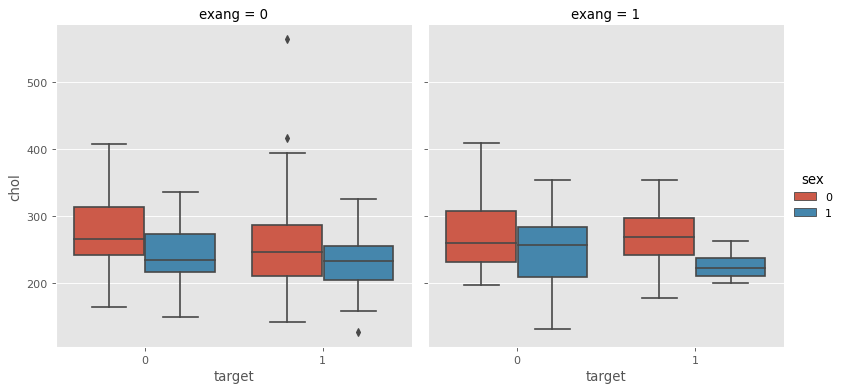

In [18]:
sns.catplot(x='target',y='chol',data=data,kind='box',hue='sex', col='exang')

Freq distribution of chol is higher for female than male  

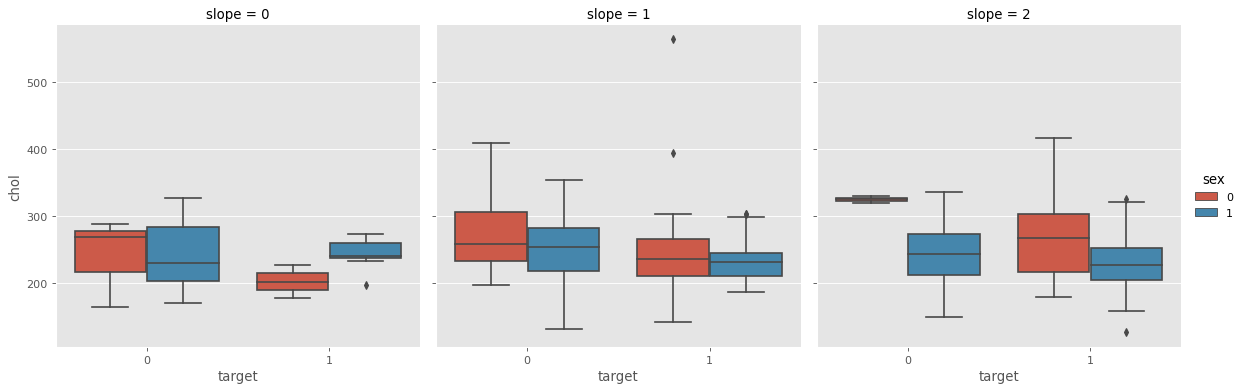

In [19]:
sns.catplot(x='target',y='chol',data=data,kind='box',hue='sex', col='slope')

For slope=0 & diesese = 1, chol value for male are higher than female

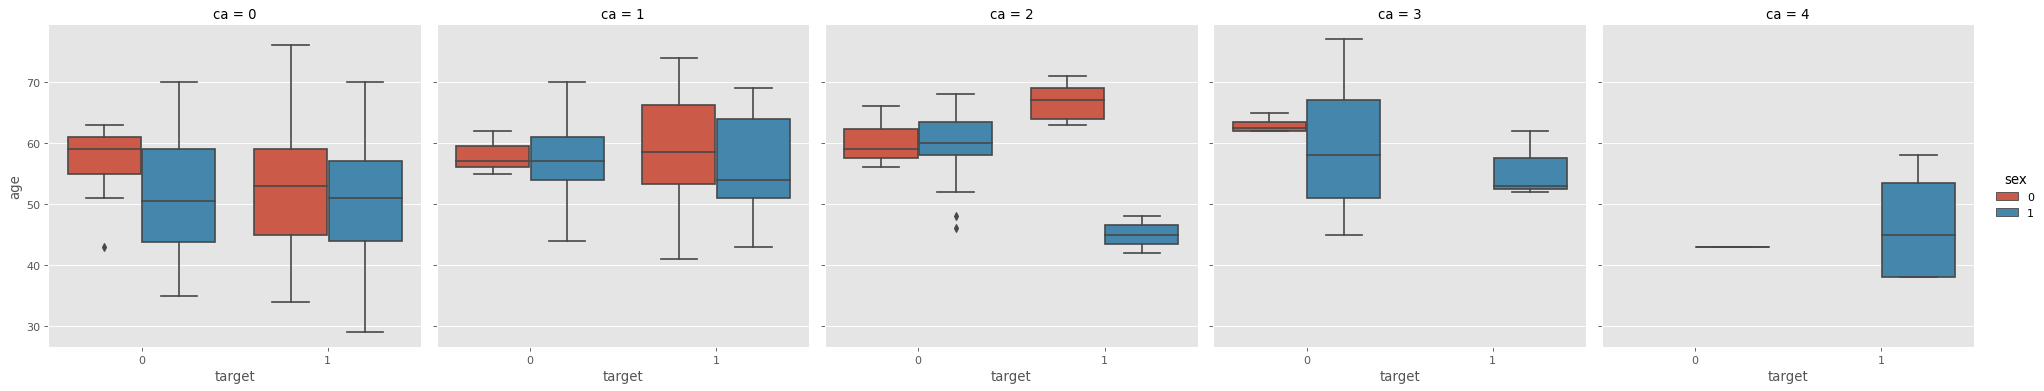

In [20]:
sns.catplot(x='target',y='age',data=data,kind='box',hue='sex', col='ca')

For ca=2, and diesese=1, male have very low age than female

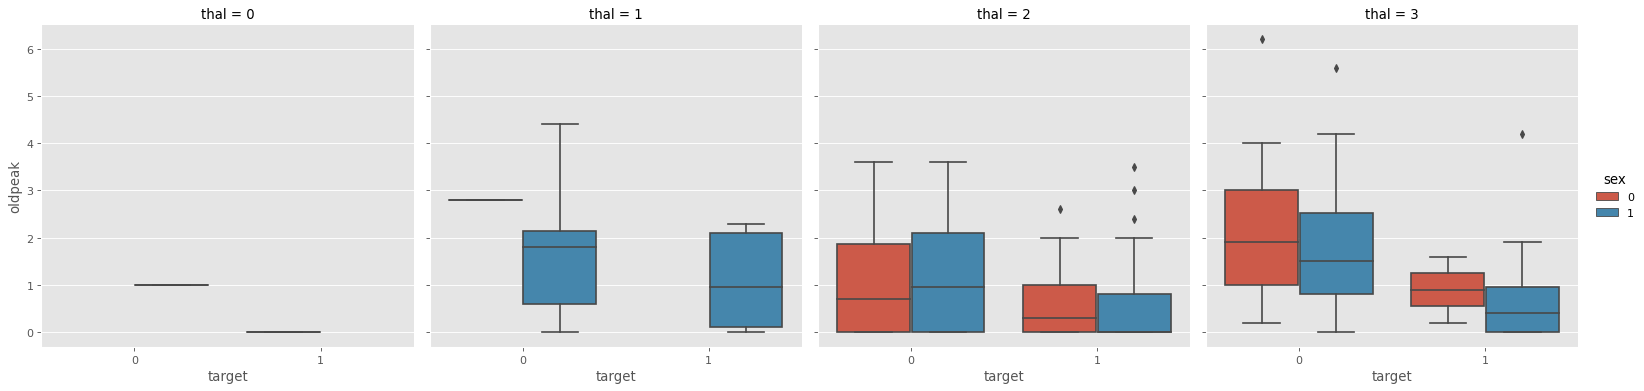

In [21]:
sns.catplot(x='target',y='oldpeak',data=data,kind='box',hue='sex', col='thal')

For thal=3 & diesese=1, age of male&female are lower than diesese=0

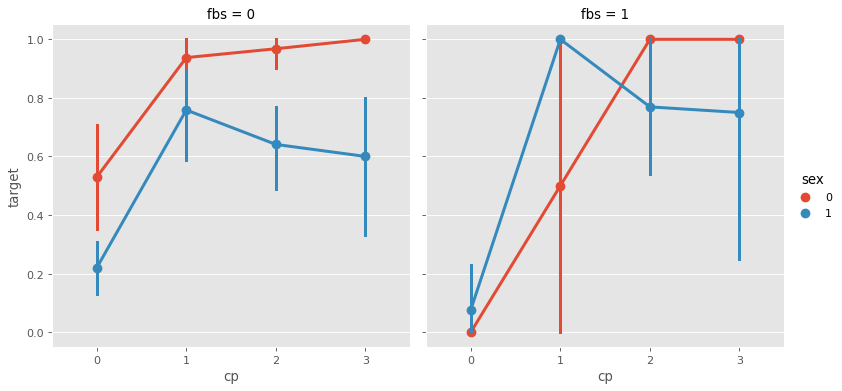

In [22]:
#Catplot cp+target+fbs+sex
sns.catplot(x='cp',y='target',kind='point',data=data,col='fbs',hue='sex')


female have higher chances of having heart diesese than male for fbs = 0

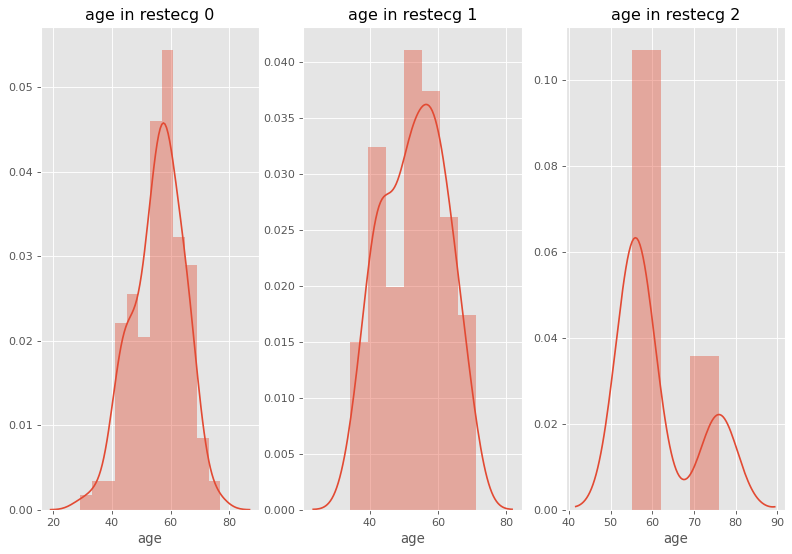

In [23]:
#Variable = age Vs restecg
f,ax=plt.subplots(1,3,figsize=(12,8))
sns.distplot(data[data['restecg']==0].age,ax=ax[0])
ax[0].set_title('age in restecg 0')
sns.distplot(data[data['restecg']==1].age,ax=ax[1])
ax[1].set_title('age in restecg 1')
sns.distplot(data[data['restecg']==2].age,ax=ax[2])
ax[2].set_title('age in restecg 2')
plt.show()

older people (age= 60 & 80) have restecg=2

Text(0.5, 1.0, 'age in fbs 1')

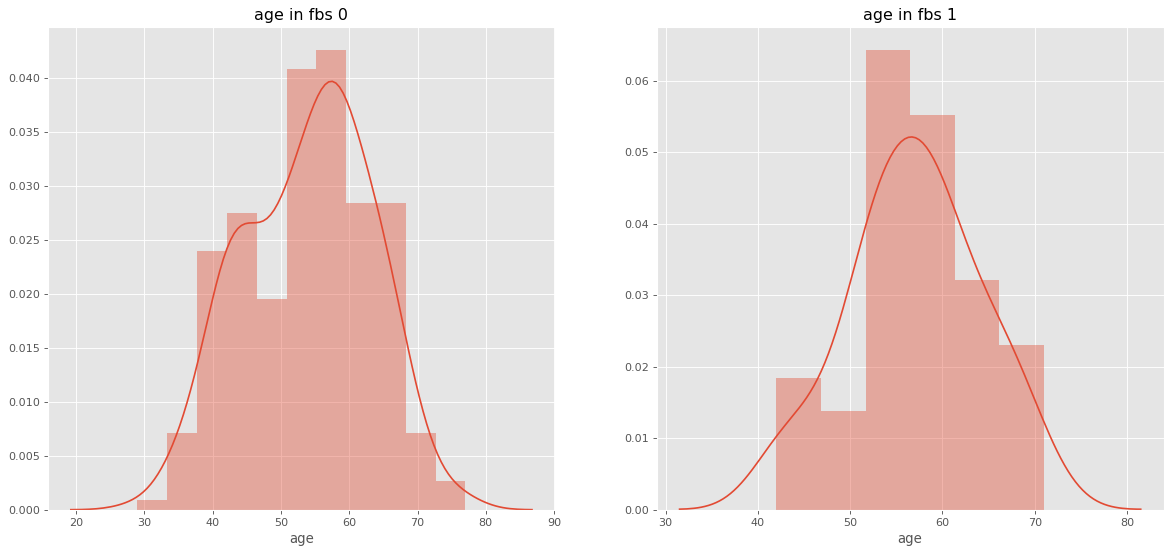

In [24]:
#Variable = age Vs fbs
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(data[data['fbs']==0].age,ax=ax[0])
ax[0].set_title('age in fbs 0')
sns.distplot(data[data['fbs']==1].age,ax=ax[1])
ax[1].set_title('age in fbs 1')

people (age< 42) have no fbs

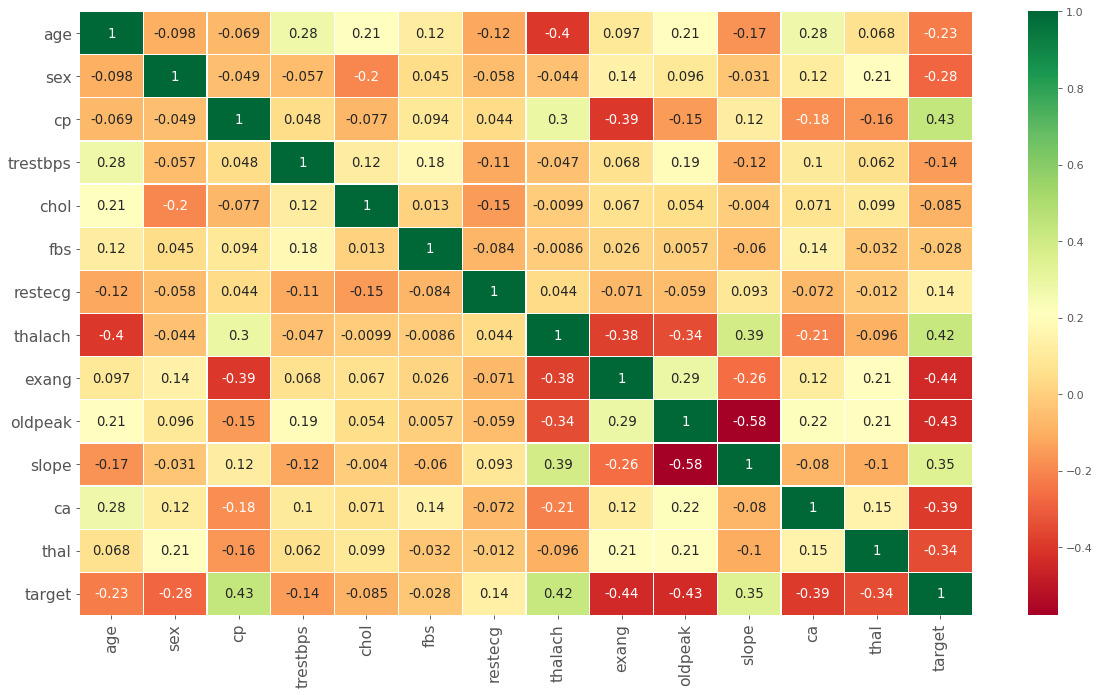

In [25]:
#Final Pair plot
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':12})
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Data Processing 

In [26]:
train = data.drop(["target"],axis=1)
train_ = data["target"]

X_train = train.values
y_train = train_.values

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

Train Test Split

In [28]:
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
train_x, test_x,train_y,test_y = train_test_split(X_train,y_train,test_size  = 0.2, random_state=0)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_x.shape, test_x.shape))


Train dataset shape: (242, 13), 
Test dataset shape: (61, 13)


Machine Learning Algorithm begins

Simple KNN (K Nearest Neighbours)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#storing  the K nearest neighbors classifier
Misclassified_sample = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
print("Misclassified_sample = ", Misclassified_sample)

Misclassified_sample =  [11, 11, 10, 9, 11, 9, 10, 7, 9, 7, 10, 11, 9, 9, 9, 9, 9, 9, 11, 11, 11, 10, 10, 10, 11, 10, 12, 11, 12]


accuracy_score KNN=8 : 0.8852459016393442


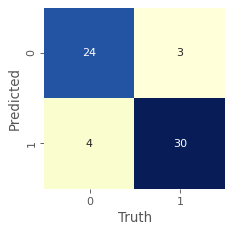

In [30]:
# Lowest number of samples for K=8

KNN_classifier = KNeighborsClassifier(n_neighbors=8)

# Fitting the values fo X and Y
KNN_classifier.fit(train_x, train_y)

#Predicting the test values with Model
prediction =  KNN_classifier.predict(test_x)

###### confusion matrix  starts ######
from sklearn.metrics import accuracy_score, confusion_matrix
cm_knn = confusion_matrix(test_y,prediction) 
names = np.unique(prediction)
sns.heatmap(cm_knn, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')
###### Confusion matrix ends ########

#calculating the accuracy
accuracy_score = accuracy_score(test_y,prediction)
print("accuracy_score KNN=8 :",accuracy_score)

KNN accuracy : 88.52% with only 7 misclassified samples

Logistic Regresion 

In [31]:
# Generic function for model building
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def fit_and_test(classifier, X_train, y_train, X_test, y_test, only_return_accuracy=False):
  classifier.fit(X_train, y_train)
  y_hat = classifier.predict(X_test)
  print('accuracy:', accuracy_score(y_test, y_hat))
  if not only_return_accuracy:
    print('f1_score:', f1_score(y_test, y_hat))


In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#grid search over regularisation hyperparameter 'c'
for c in [0.001,.01, 0.02, 0.05, 0.25, 0.5, 0.75, 1,1.05,1.1,1.5,1.6,2,7]:
  lr = LogisticRegression(C=c, max_iter=1000) 
  print (f'At C = {c}:-', end=' ')
  fit_and_test(lr, train_x, train_y, test_x, test_y, True)

At C = 0.001:- accuracy: 0.8032786885245902
At C = 0.01:- accuracy: 0.819672131147541
At C = 0.02:- accuracy: 0.8360655737704918
At C = 0.05:- accuracy: 0.8360655737704918
At C = 0.25:- accuracy: 0.8524590163934426
At C = 0.5:- accuracy: 0.8524590163934426
At C = 0.75:- accuracy: 0.8524590163934426
At C = 1:- accuracy: 0.8524590163934426
At C = 1.05:- accuracy: 0.8524590163934426
At C = 1.1:- accuracy: 0.8524590163934426
At C = 1.5:- accuracy: 0.8524590163934426
At C = 1.6:- accuracy: 0.8524590163934426
At C = 2:- accuracy: 0.8524590163934426
At C = 7:- accuracy: 0.8524590163934426


Logistic Regression Accuracy : 85.42% 

# Conclusion : We recommend KNN (88.52% accuracy with only 7 misclassified samples) to build the model

# **Please UpVote, if you have liked my Kernel :)**